# This script processes the file All_Optimizations.csv  

1. Generate the file All_Optimizations.txt by running:
    1. process_baseline_results.ipynb (for Baseline)
    2. process_opt1_results.ipynb (for Opt1-Quadtree)
    3. o2and3_minradius.ipynb (for Opt2-minradius)
    4. o2and3_maxnumber.ipynb (for Opt2-maxnumber)
    5. sycl_minraidus.ipynb (for Opt3-Memo-* using 1 thread and Par8Cores-* wiht 8 threads)


2. Run the next cells in this notebook...

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

df=pd.read_csv('All_Optimizations_minrad.csv',sep=';')
df['Total']=df['Time Tree']+df['Time OWM']
df.head()

,Optimization,Cloud,Time Tree,Time OWM,Total
0,Baseline,Alcoy,4.74,22.55,27.29
1,Baseline,Arzua,5.75,22.94,28.69
2,Baseline,BrionF,5.97,19.75,25.72
3,Baseline,BrionU,6.76,21.30,28.06
4,Opt1-Quadtree,Alcoy,3.18,12.48,15.66


In [65]:
base=df.loc[0:3,'Time Tree':'Total']
best=df.loc[16:19,'Time Tree':'Total']
print(base)
print(best)

   Time Tree  Time OWM  Total
0       4.74     22.55  27.29
1       5.75     22.94  28.69
2       5.97     19.75  25.72
3       6.76     21.30  28.06
    Time Tree  Time OWM  Total
16       0.14      0.21   0.35
17       0.26      0.21   0.47
18       0.50      0.14   0.64
19       0.57      0.16   0.73


In [71]:
b=np.array(base)
c=np.array(best)
speedup=b/c
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}x".format(x)})
#Print total speedup for each cloud (one cloud per row, one column for ech time measurement)
print(speedup)

[[33.86x 107.38x 77.97x]
 [22.12x 109.24x 61.04x]
 [11.94x 141.07x 40.19x]
 [11.86x 133.12x 38.44x]]


# Speedup of each optimization w.r.t. the previous one

In [45]:
df['Tree Sp']=1
df['OWM Sp']=1
df['Total Sp']=1

#Speedup of one optimization w.r.t. the previous one
for i in range(4,len(df)):
    df.loc[i,'Tree Sp']=df['Time Tree'][i-4]/df['Time Tree'][i]
    df.loc[i,'OWM Sp']=df['Time OWM'][i-4]/df['Time OWM'][i]
    df.loc[i,'Total Sp']=df['Total'][i-4]/df['Total'][i]
df

,Optimization,Cloud,Time Tree,Time OWM,Total,Tree Sp,OWM Sp,Total Sp
0,Baseline,Alcoy,4.74,22.55,27.29,1.000000,1.000000,1.000000
1,Baseline,Arzua,5.75,22.94,28.69,1.000000,1.000000,1.000000
2,Baseline,BrionF,5.97,19.75,25.72,1.000000,1.000000,1.000000
3,Baseline,BrionU,6.76,21.30,28.06,1.000000,1.000000,1.000000
4,Opt1-Quadtree,Alcoy,3.18,12.48,15.66,1.490566,1.806891,1.742656
5,Opt1-Quadtree,Arzua,3.77,10.03,13.80,1.525199,2.287139,2.078986
6,Opt1-Quadtree,BrionF,4.03,11.07,15.10,1.481390,1.784101,1.703311
7,Opt1-Quadtree,BrionU,4.50,12.98,17.48,1.502222,1.640986,1.605263
8,Opt2-MinRadius,Alcoy,1.02,1.63,2.65,3.117647,7.656442,5.909434
9,Opt2-MinRadius,Arzua,1.61,2.20,3.81,2.341615,4.559091,3.622047


# Important notice

**The sum of the relative speedups (one optim. wrt the previous one) is not the total speedup**

In [48]:
df.groupby('Cloud').sum().drop(['Time Tree','Time OWM','Total'],axis=1)

/var/folders/3m/wbwr7b111j5gzwwf_cf38xwc0000gn/T/ipykernel_50214/4234181207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Cloud').sum().drop(['Time Tree','Time OWM','Total'],axis=1)


,Tree Sp,OWM Sp,Total Sp
Cloud,,,
Alcoy,12.167737,17.015714,15.206408
Arzua,11.431735,15.084325,13.559387
BrionF,10.157974,16.363298,12.016173
BrionU,10.108939,16.412375,11.929910


# Speedup of each optimization w.r.t. baseline

In [80]:
#Speedup of one optimization w.r.t. baseline
for i in range(4,len(df),4):
    for j in range(4):
        df.loc[i+j,'Tree Sp']=df['Time Tree'][j]/df['Time Tree'][i+j]
        df.loc[i+j,'OWM Sp']=df['Time OWM'][j]/df['Time OWM'][i+j]
        df.loc[i+j,'Total Sp']=df['Total'][j]/df['Total'][i+j]
df

,Optimization,Cloud,Time Tree,Time OWM,Total,Tree Sp,OWM Sp,Total Sp
0,Baseline,Alcoy,4.74,22.55,27.29,1.000000,1.000000,1.000000
1,Baseline,Arzua,5.75,22.94,28.69,1.000000,1.000000,1.000000
2,Baseline,BrionF,5.97,19.75,25.72,1.000000,1.000000,1.000000
3,Baseline,BrionU,6.76,21.30,28.06,1.000000,1.000000,1.000000
4,Opt1-Quadtree,Alcoy,3.18,12.48,15.66,1.490566,1.806891,1.742656
5,Opt1-Quadtree,Arzua,3.77,10.03,13.80,1.525199,2.287139,2.078986
6,Opt1-Quadtree,BrionF,4.03,11.07,15.10,1.481390,1.784101,1.703311
7,Opt1-Quadtree,BrionU,4.50,12.98,17.48,1.502222,1.640986,1.605263
8,Opt2-MinRadius,Alcoy,1.02,1.63,2.65,4.647059,13.834356,10.298113
9,Opt2-MinRadius,Arzua,1.61,2.20,3.81,3.571429,10.427273,7.530184


In [86]:
df[df['Cloud']=='Alcoy']['OWM Sp']

0       1.000000
4       1.806891
8      13.834356
12     21.476190
16    107.380952
Name: OWM Sp, dtype: float64

In [91]:
df[df['Cloud']=='Alcoy']['OWM Sp']/107.38*100

0       0.931272
4       1.682707
8      12.883550
12     20.000177
16    100.000887
Name: OWM Sp, dtype: float64

# Spedup for each cloud

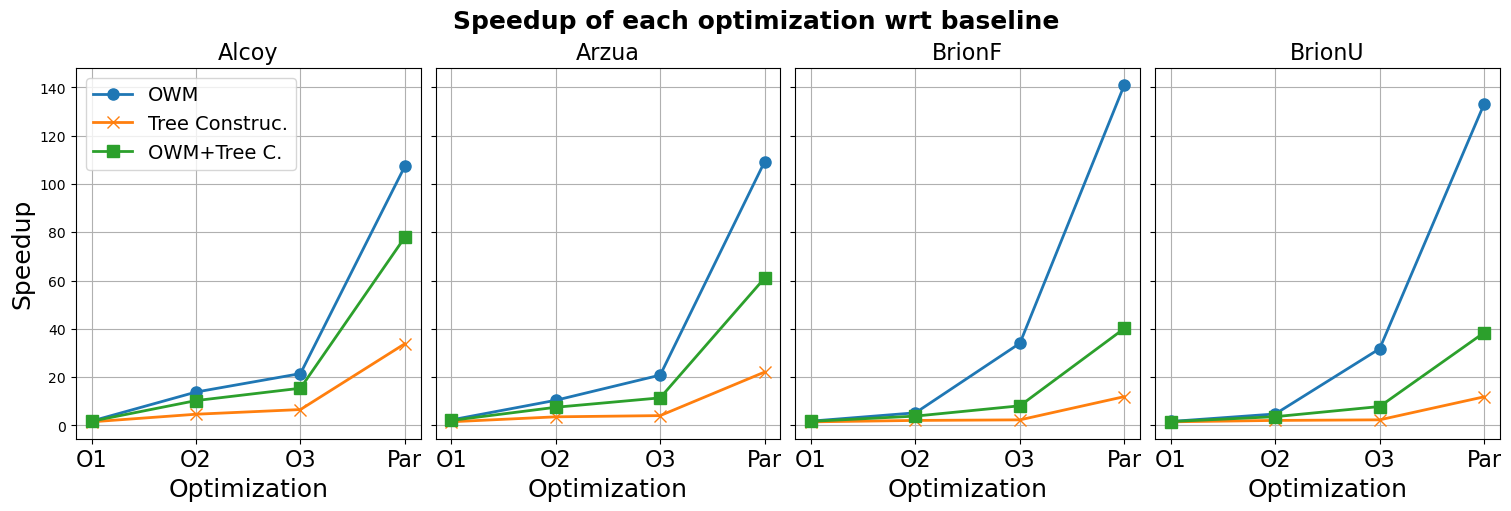

In [112]:
def plot_allsp(df):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    all=np.array(df.loc[4:,'Tree Sp':'Total Sp'])
    clouds=list(df.loc[0:3,'Cloud'])
    bycloud={}
    for i,j in zip(clouds,range(len(clouds))):
        bycloud[i]=all[j::4].T

    #fig = plt.figure()
    labels=['OWM','Tree Construc.','OWM+Tree C.']
    x=np.arange(1,5)
    xlab=['O1','O2','O3','Par']
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True, sharey=True)
    for i,name in zip(range(len(clouds)),clouds):
        axs[i].plot(x, bycloud[name][1], marks[0], linewidth=linew, markersize=markers)
        axs[i].plot(x, bycloud[name][0], marks[1], linewidth=linew, markersize=markers)
        axs[i].plot(x, bycloud[name][2], marks[2], linewidth=linew, markersize=markers)

        axs[i].set_title(name,fontsize=16)
        axs[i].set_xlabel('Optimization', fontsize=xlabelfs)
        axs[i].set_xticks(x,labels=xlab,fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()
    fig.suptitle('Speedup of each optimization wrt baseline',  fontweight='bold', fontsize=18)
    
    axs[0].set_ylabel('Speedup', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    pp = PdfPages("Speedup_all_optim.pdf")
    pp.savefig(fig)
    pp.close()
    #axs[i].show()

plot_allsp(df)

In [108]:
all=np.array(df.loc[4:,'Tree Sp':'Total Sp'])
clouds=list(df.loc[0:3,'Cloud'])
bycloud={}
for i,j in zip(clouds,range(len(clouds))):
    bycloud[i]=all[j::4].T
bycloud    
#bycloud['Alcoy'][1]

{'Alcoy': array([[1.49x, 4.65x, 6.58x, 33.86x],
        [1.81x, 13.83x, 21.48x, 107.38x],
        [1.74x, 10.30x, 15.42x, 77.97x]]),
 'Arzua': array([[1.53x, 3.57x, 4.08x, 22.12x],
        [2.29x, 10.43x, 20.85x, 109.24x],
        [2.08x, 7.53x, 11.43x, 61.04x]]),
 'BrionF': array([[1.48x, 2.08x, 2.31x, 11.94x],
        [1.78x, 5.24x, 34.05x, 141.07x],
        [1.70x, 3.87x, 8.14x, 40.19x]]),
 'BrionU': array([[1.50x, 2.08x, 2.32x, 11.86x],
        [1.64x, 4.75x, 31.79x, 133.12x],
        [1.61x, 3.63x, 7.84x, 38.44x]])}

In [105]:
 x=np.arange(1,5)
x

array([1, 2, 3, 4])

In [49]:
pp = PdfPages("Speedup-ompBaseline.pdf")
pp.savefig(fig)
pp.close()